In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [31]:
df = pd.read_csv("NCVS_Select_-_Personal_Victimization.csv")

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63465 entries, 0 to 63464
Data columns (total 37 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   idper           63465 non-null  object 
 1   yearq           63465 non-null  float64
 2   year            63465 non-null  int64  
 3   ager            63465 non-null  int64  
 4   sex             63465 non-null  int64  
 5   hispanic        63465 non-null  int64  
 6   race            63465 non-null  int64  
 7   race_ethnicity  63465 non-null  int64  
 8   hincome1        63465 non-null  int64  
 9   hincome2        63465 non-null  int64  
 10  marital         63465 non-null  int64  
 11  popsize         63465 non-null  int64  
 12  region          63465 non-null  int64  
 13  msa             63465 non-null  int64  
 14  locality        63465 non-null  int64  
 15  educatn1        63465 non-null  int64  
 16  educatn2        63465 non-null  int64  
 17  veteran         63465 non-null 

In [33]:
df['year']

0        2004
1        2009
2        2004
3        2011
4        2004
         ... 
63460    2021
63461    2021
63462    2021
63463    2021
63464    2021
Name: year, Length: 63465, dtype: int64

In [34]:
df = df.drop(columns=(['idper']))

<Axes: title={'center': 'Cases by Year'}, xlabel='year', ylabel='count'>

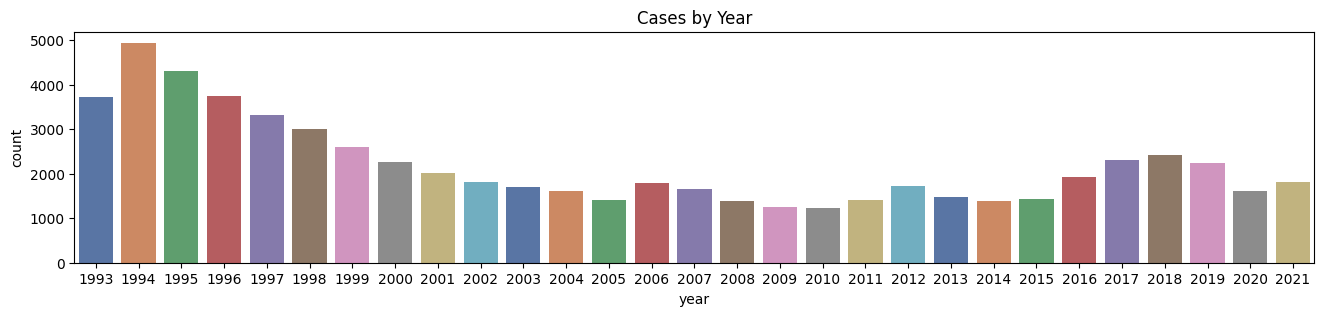

In [49]:
plt.figure(figsize=(16,3))
plt.title('Cases by Year')
sns.countplot(data=df,x='year',palette='deep')

In [35]:
quarters = []
for year in df['yearq']:
    try:
        quarter = str(year).split('.')[1]
    except IndexError:
        quarter = 'Invalid'
    quarters.append(quarter)

df['quarter'] = quarters

<Axes: xlabel='yearq', ylabel='count'>

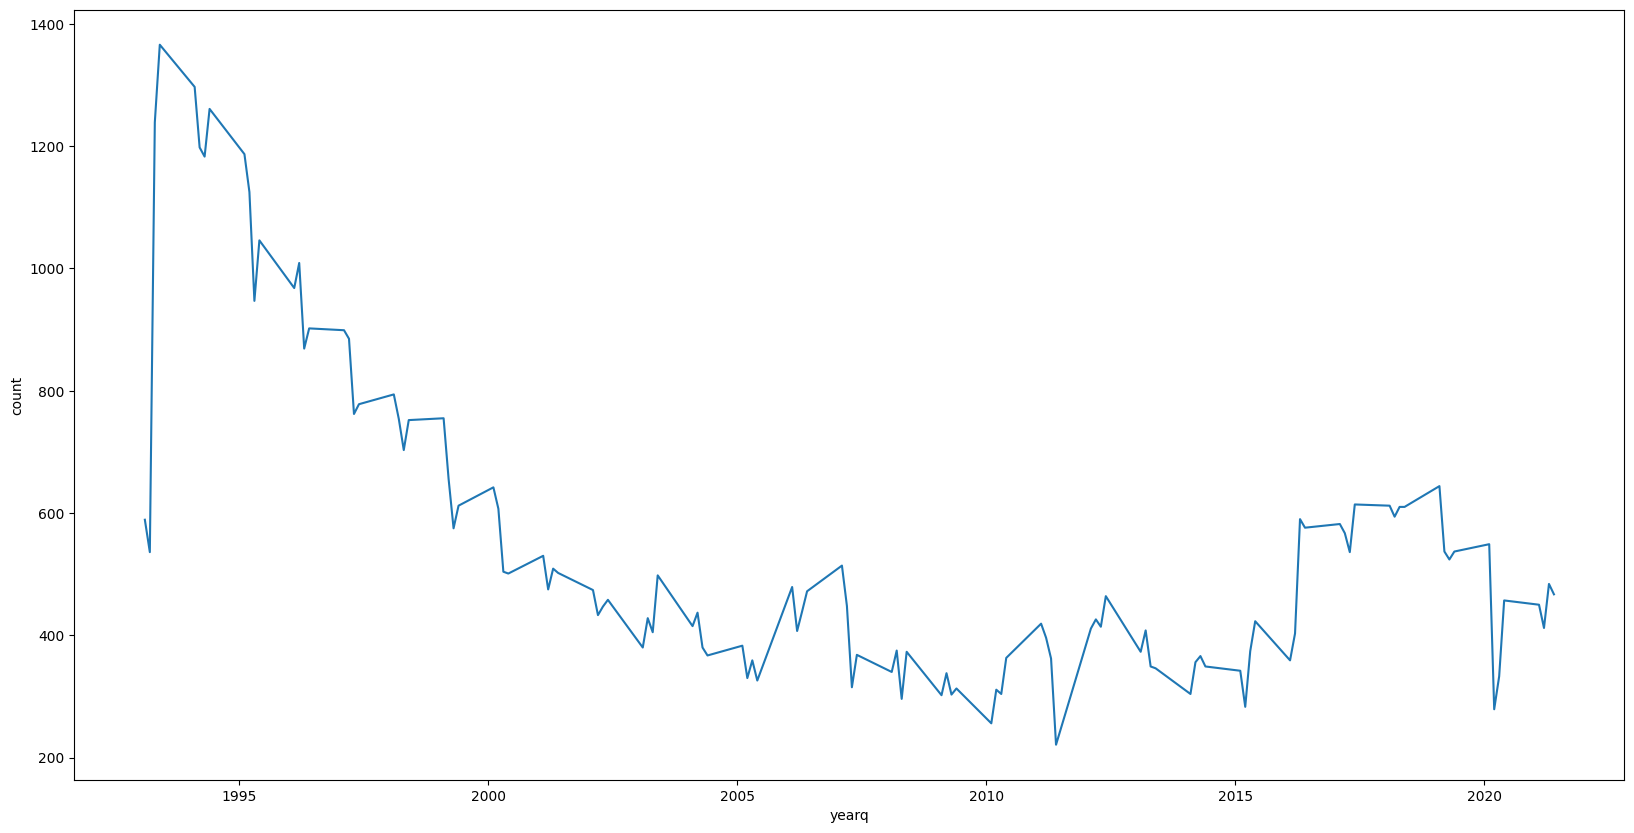

In [36]:
time_df = df['yearq'].value_counts().reset_index()
plt.figure(figsize=(20,10))
sns.lineplot(data=time_df, x='yearq', y='count')


<Axes: title={'center': 'Cases by Year, (Quarters)'}, xlabel='year', ylabel='count'>

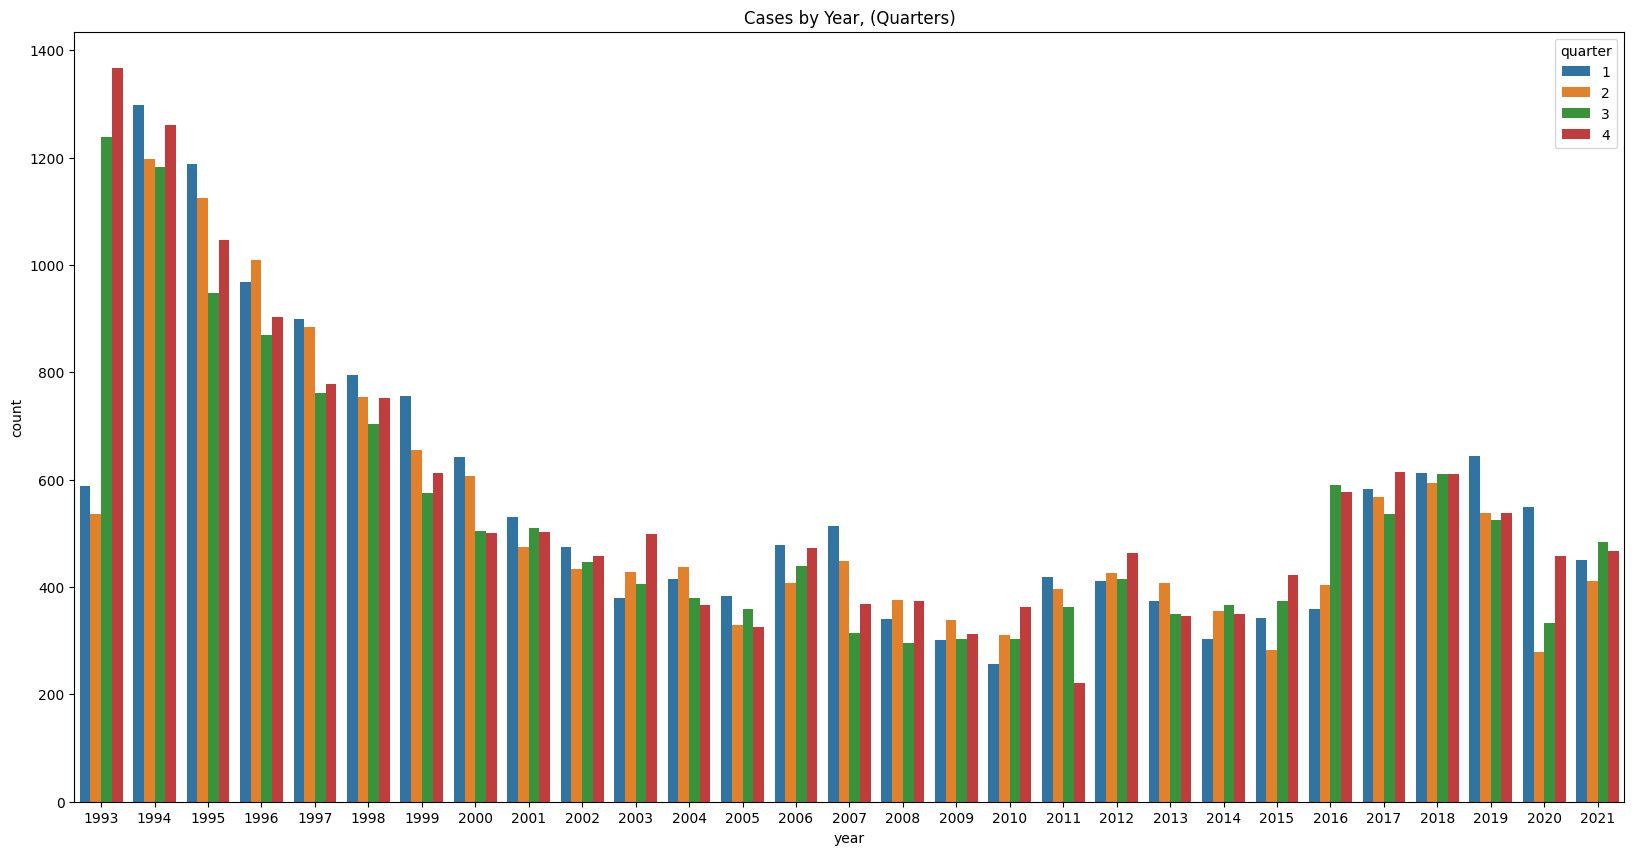

In [37]:
plt.figure(figsize=(20,10))
plt.title('Cases by Year, (Quarters)')
sns.countplot(x=df['year'],hue=df['quarter'],hue_order=['1','2','3','4'])

,yearq,year,ager,sex,hispanic,race,race_ethnicity,hincome1,hincome2,marital,...,injury,serious,treatment,offenderage,offendersex,offtracenew,wgtviccy,series,newwgt,quarter
0,2004.1,2004,2,2,2,2,2,1,-1,1,...,0,1,0,3,1,-1,1952.973730,1,1952.973730,1
1,2009.1,2009,1,1,2,1,1,7,-1,1,...,0,1,0,5,1,-1,5570.687730,1,5570.687730,1
2,2004.1,2004,4,1,2,1,1,5,-1,2,...,0,1,0,4,1,-1,3366.957480,1,3366.957480,1
3,2011.4,2011,3,1,1,1,6,5,-1,2,...,0,1,0,88,1,-1,6991.560610,1,6991.560610,4
4,2004.1,2004,2,1,2,1,1,6,-1,1,...,1,3,1,3,3,-1,2834.649050,1,2834.649050,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63460,2021.3,2021,2,2,2,1,1,7,3,1,...,0,1,0,4,1,1,1255.609375,1,1255.609375,3
63461,2021.3,2021,4,2,2,1,1,7,5,2,...,0,1,0,3,1,2,842.529114,1,842.529114,3
63462,2021.4,2021,1,1,2,1,1,7,3,1,...,1,3,1,1,1,7,1029.867432,1,1029.867432,4
63463,2021.3,2021,2,1,2,1,1,6,3,1,...,0,1,0,2,1,1,5833.862305,1,5833.862305,3
